# Proyecto de Churn Prediction

## 1.Enmarcar Problema

Este proyecto nos va a permitir predecir el churn de una empresa de telecomunicaciones.

**¿Qué es el churn?**

Churn significa abandono de clientes.

Un cliente "churned" es aquel que dejó de usar el servicio o canceló la suscripción.

Es un problema crítico en sectores como:

- Telecomunicaciones (clientes que cancelan contratos de telefonía/internet).

- Banca y seguros y energías (clientes que se cambian de banco o cancelan pólizas).

- SaaS y suscripciones (usuarios que cancelan Netflix, Spotify, etc.).

**Importancia del problema**

Captar un cliente nuevo es 5 a 7 veces más caro que retener uno existente.

Reducir churn incluso un 5 % puede aumentar beneficios entre un 25 % y 95 % (Harvard Business Review).

Saber qué clientes tienen más probabilidad de churn permite:

- Aplicar campañas de retención dirigidas.

- Ofrecer descuentos o upgrades a clientes en riesgo.

- Mejorar el producto/servicio en función de los factores que explican el abandono.

**Enunciado del proyecto**

Queremos construir un modelo de Machine Learning que prediga si un cliente va a abandonar el servicio (churn = 1) o se va a quedar (churn = 0).

Esto implica un problema de clasificación binaria:

- Input → datos del cliente (edad, género, tipo de contrato, gastos mensuales, tiempo en la compañía, servicios contratados, etc.).

- Output → probabilidad de que el cliente haga churn.

## 2.Cargar Datos

**Contenido**

Cada fila representa a un cliente, cada columna contiene los atributos del cliente descritos en la columna Metadatos.

El conjunto de datos incluye información sobre:

- Clientes que se han dado de baja en el último mes: la columna se llama Churn

- Servicios a los que se ha suscrito cada cliente: teléfono, líneas múltiples, Internet, seguridad en línea, copias de seguridad en línea, protección de dispositivos, asistencia técnica y streaming de televisión y películas.

- Información de la cuenta del cliente: tiempo que lleva siendo cliente, contrato, método de pago, facturación electrónica, cargos mensuales y cargos totales.

- Información demográfica sobre los clientes: sexo, rango de edad y si tienen pareja y personas a su cargo.


Usaremos el dataset de [Telco Customer Churn (Kaggle)](https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data):

- Filas → clientes individuales.

- Columnas → características del cliente:

  - Datos demográficos: gender, seniorCitizen, partner, dependents.

  - Datos del contrato: tenure, contract, paymentMethod.

  - Datos de consumo: monthlyCharges, totalCharges.

  - Target (etiqueta): Churn (Yes/No).

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Copiamos para mantener una versión cruda
# df_raw = df.copy()

# Vista rápida
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Exploración Inicial

In [ ]:
# Dimensiones del dataset
print("Shape (filas, columnas):", df.shape)

# Tipos de variables y nulos
print("\nInfo:")
print(df.info())

# Muestra aleatoria
print("\nMuestra aleatoria:")
display(df.sample(5, random_state=42))

Shape (filas, columnas): (7043, 21)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16 

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000



Muestra aleatoria:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
185,1024-GUALD,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,24.80,24.8,Yes
2715,0484-JPBRU,Male,0,No,No,41,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),25.25,996.45,No
3825,3620-EHIMZ,Female,0,Yes,Yes,52,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1031.7,No
1807,6910-HADCM,Female,0,No,No,1,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,No,Electronic check,76.35,76.35,Yes
132,8587-XYZSF,Male,0,No,No,67,Yes,No,DSL,No,...,No,Yes,No,No,Two year,No,Bank transfer (automatic),50.55,3260.1,No


In [ ]:
# Estadísticas descriptivas básicas
print("\nDescriptivo numérico:")
display(df.describe())


Descriptivo numérico:


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441,0.265370
std,0.368612,24.559481,30.090047,2266.771362,0.441561
min,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.500000,401.450000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000
75%,0.000000,55.000000,89.850000,3794.737500,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


### Valores nulos y duplicados

In [ ]:
print("Valores nulos por columna:")
print(df.isna().sum())
# df.fillna() -> imputar valores nulos (media, mediana, moda, KNN, 0)
# df.dropna() -> eliminar valores nulos (filas o columnas)

print("\nDuplicados en el dataset:", df.duplicated().sum())
# df.drop_duplicates()

Valores nulos por columna:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Duplicados en el dataset: 0


### Variable objetivo (Churn)

In [ ]:
print("Distribución de Churn:")
print(df["Churn"].value_counts())

print("\nDistribución en porcentaje:")
print(df["Churn"].value_counts(normalize=True)*100)


Distribución de Churn:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Distribución en porcentaje:
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


## 3.Limpieza de datos

Es necesario hacer una pequeña limpieza de los datos antes del EDA, porque si no este puede resultar engañoso.

- Valores nulos
- Valores duplicados
- Tipos de datos corregidos

Con lo que hemos sacado de lo anterior tenemos:

- Sin nulos ni duplicados → no hace falta imputación.

- Variable objetivo (Churn) desbalanceada → 73 % No, 27 % Yes.

- 21 columnas:

  - Numéricas → SeniorCitizen, tenure, MonthlyCharges.

  - Categóricas → todas las demás excepto TotalCharges.

  - TotalCharges está como object → hay que convertirla a numérica.

  - customerID → no aporta valor predictivo, se puede descartar después.

In [ ]:
# Convertir TotalCharges a numérico
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Confirmar conversión
print(df["TotalCharges"].dtype)
print(df["TotalCharges"].isna().sum())  # debería ser 0 o muy pocos

float64
11


In [ ]:
# Convertir Churn (target) a binario
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

# Revisar balance
print(df["Churn"].value_counts(normalize=True)*100)

Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64


In [ ]:
# Separar columnas por tipo
num_cols = ["tenure", "MonthlyCharges", "TotalCharges", "SeniorCitizen"]
cat_cols = [col for col in df.columns if col not in num_cols + ["Churn"]]

print("Numéricas:", num_cols)
print("Categóricas:", cat_cols)

Numéricas: ['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen']
Categóricas: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


## 4.EDA

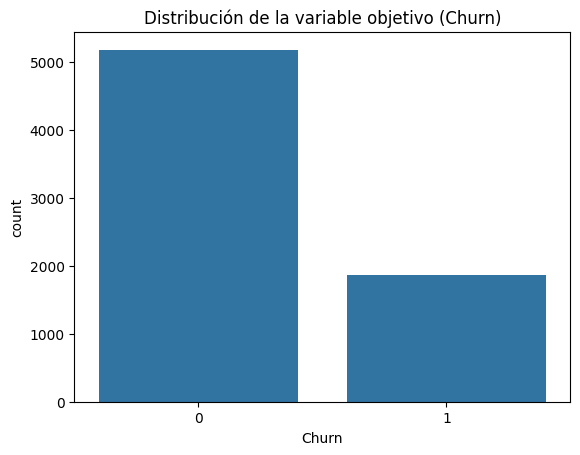

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribución de Churn
sns.countplot(x="Churn", data=df)
plt.title("Distribución de la variable objetivo (Churn)")
plt.show()


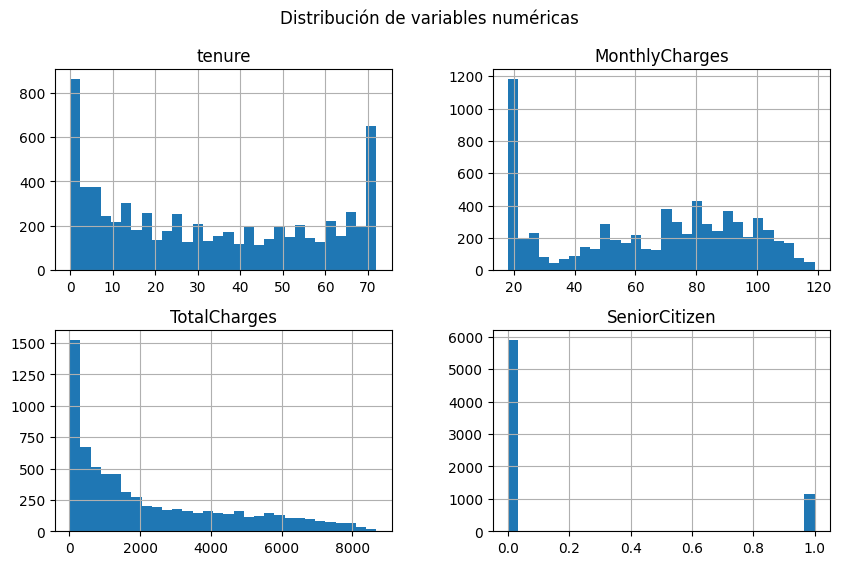

In [ ]:
# Histogramas de variables numéricas
df[num_cols].hist(bins=30, figsize=(10,6))
plt.suptitle("Distribución de variables numéricas")
plt.show()


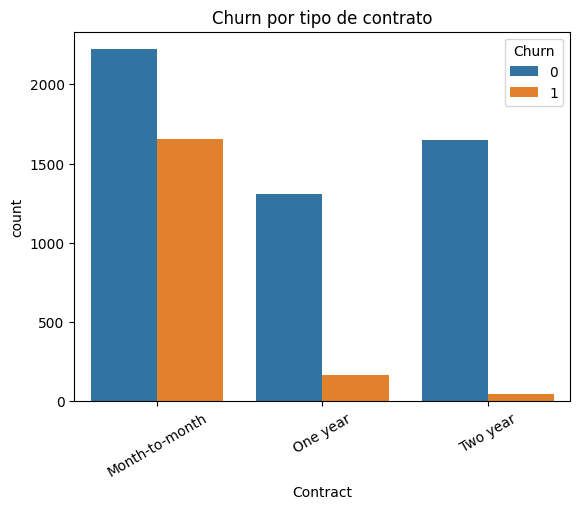

In [ ]:
# Ejemplo categórica: tipo de contrato vs churn
sns.countplot(x="Contract", hue="Churn", data=df)
plt.title("Churn por tipo de contrato")
plt.xticks(rotation=30)
plt.show()


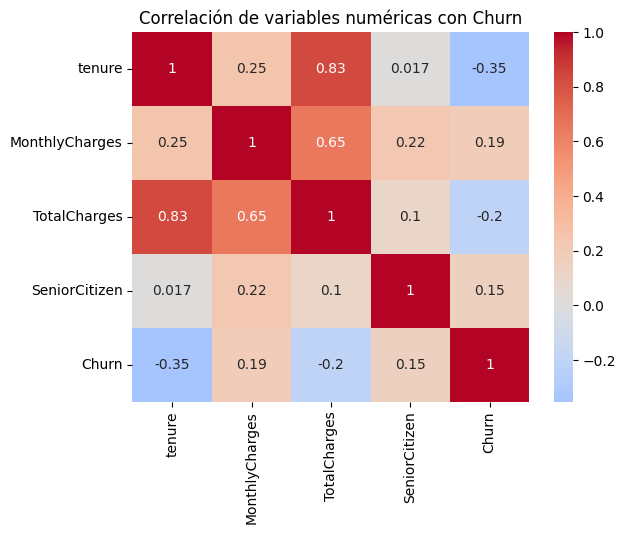

In [ ]:
# Matriz de correlación (numéricas)
corr = df[num_cols + ["Churn"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlación de variables numéricas con Churn")
plt.show()


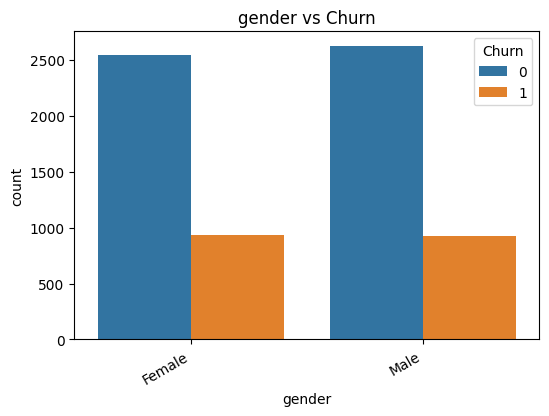

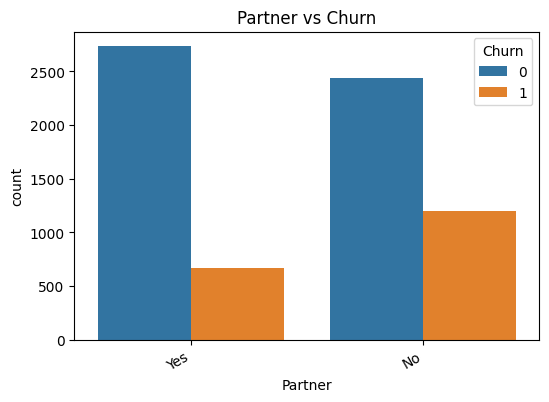

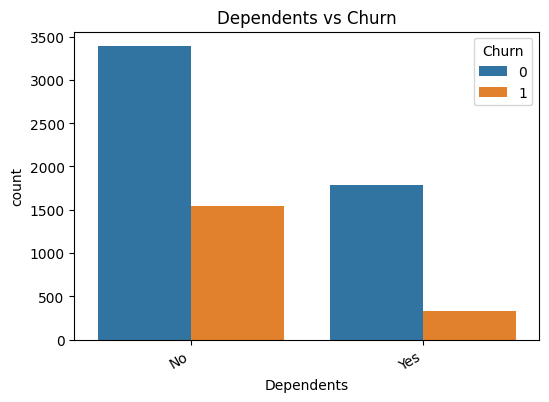

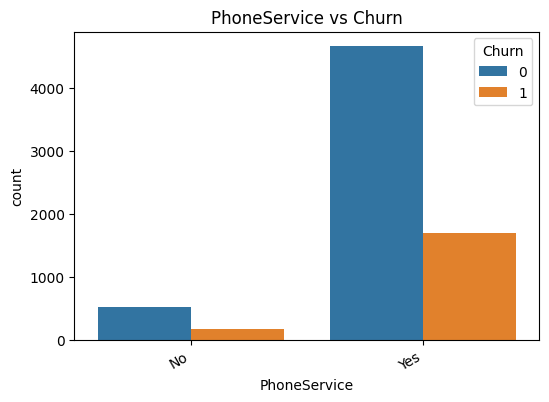

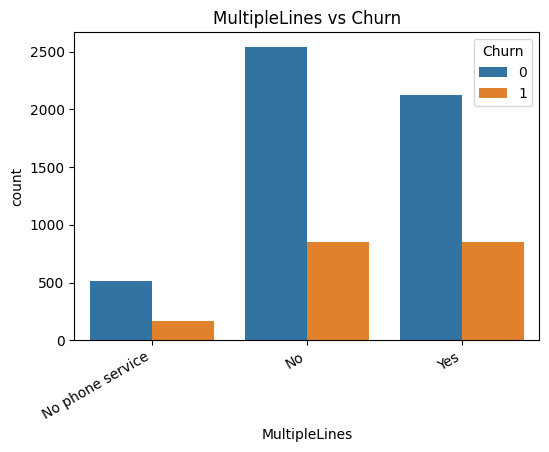

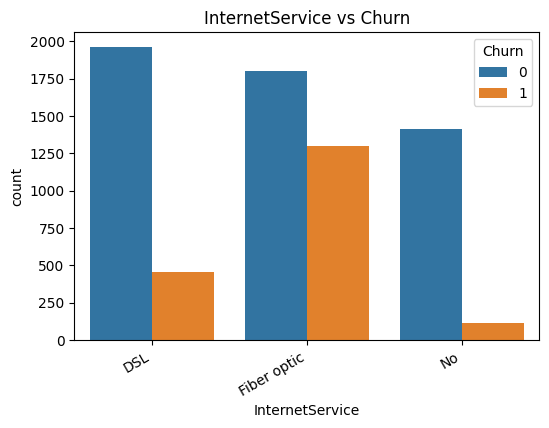

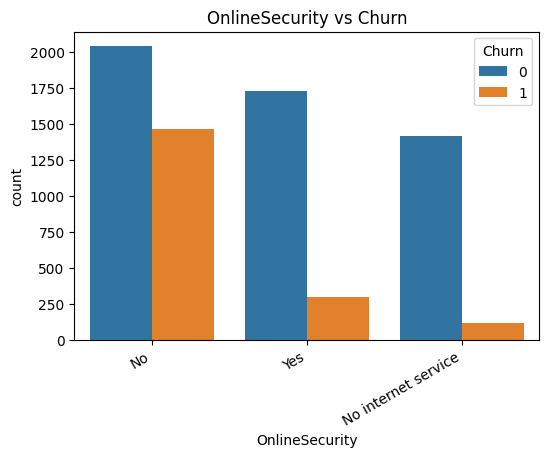

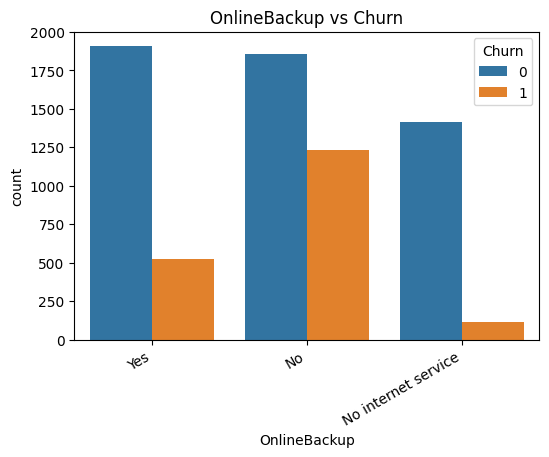

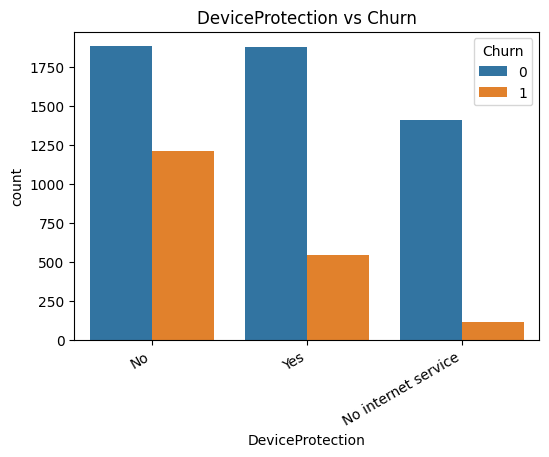

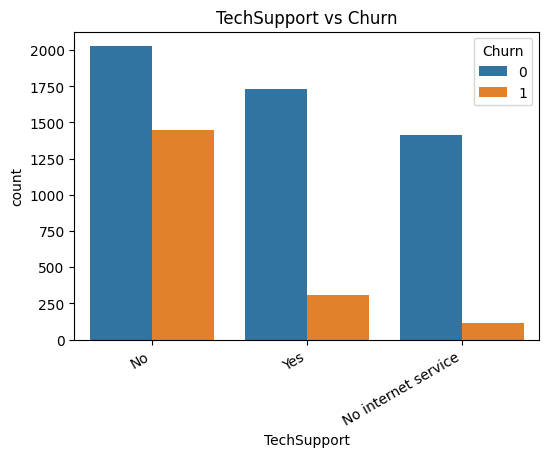

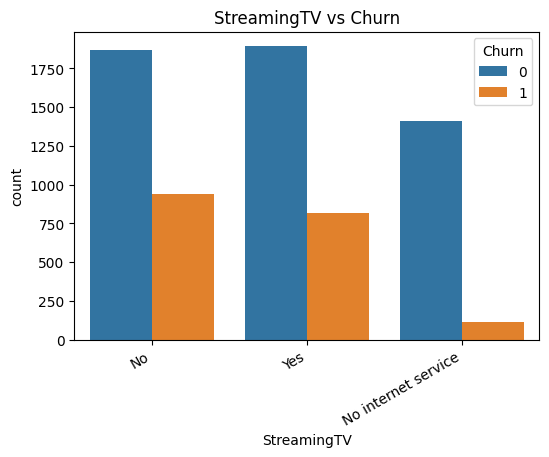

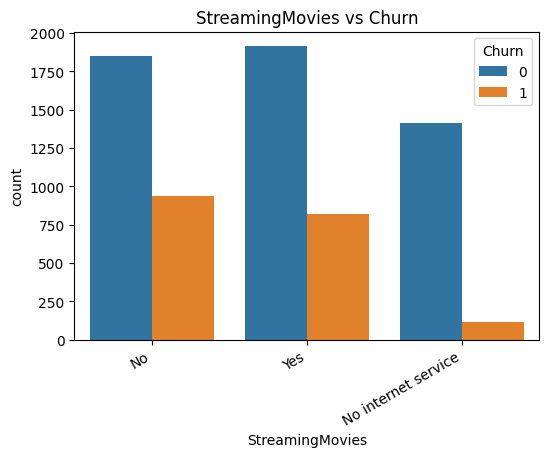

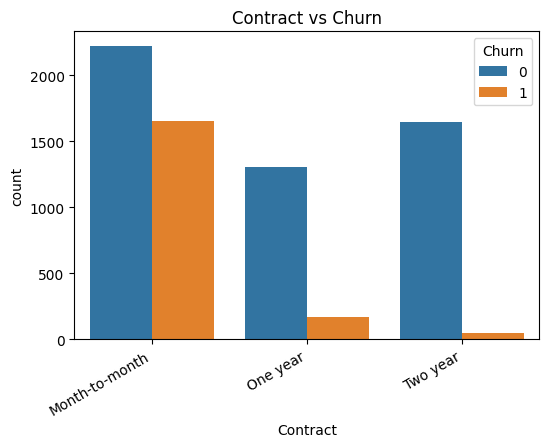

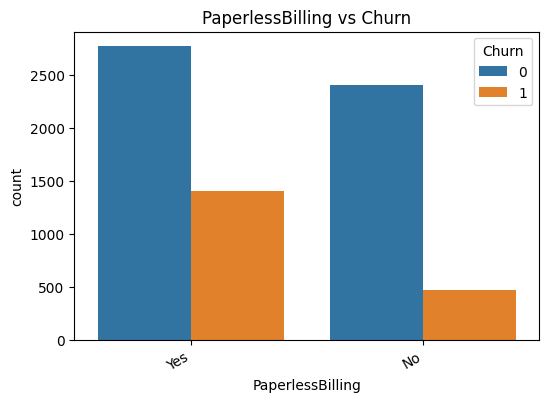

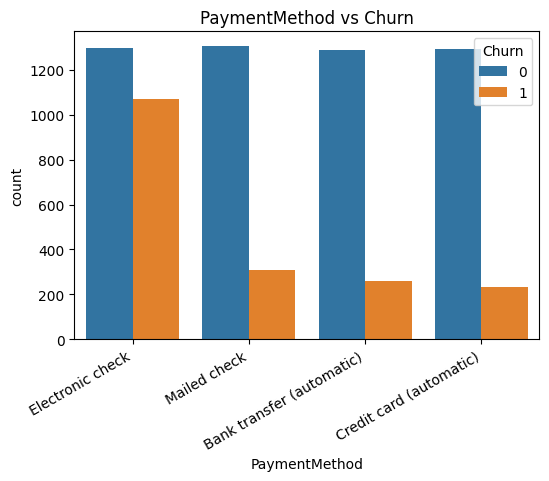

In [ ]:
# Distribución de categorías + Churn
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue="Churn", data=df)
    plt.title(f"{col} vs Churn")
    plt.xticks(rotation=30, ha="right")
    plt.show()

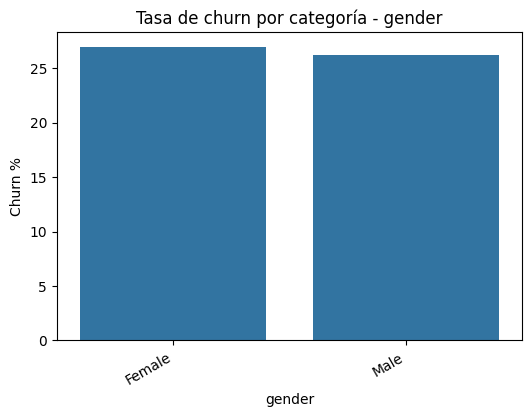

,1
gender,
Female,26.920872
Male,26.160338


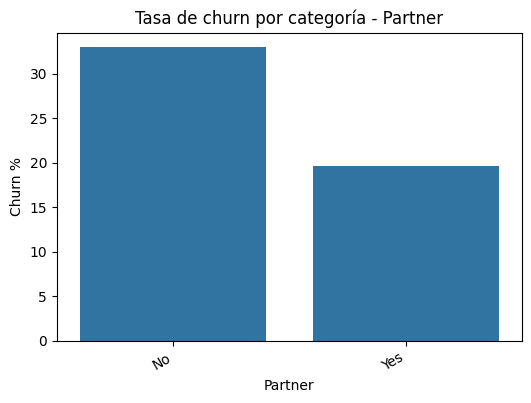

,1
Partner,
No,32.957979
Yes,19.664903


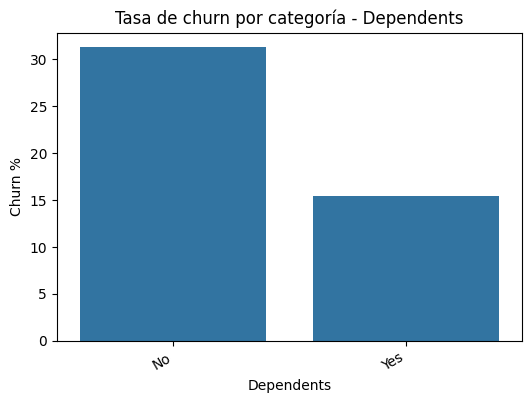

,1
Dependents,
No,31.279140
Yes,15.450237


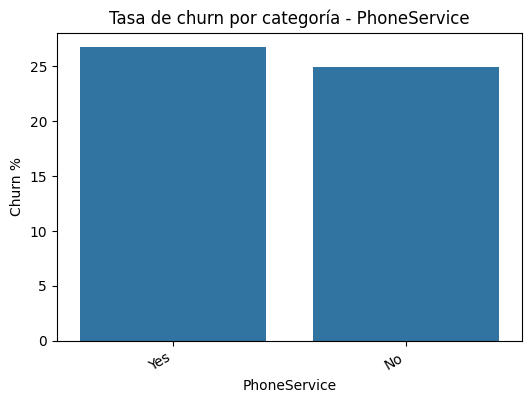

,1
PhoneService,
Yes,26.709637
No,24.926686


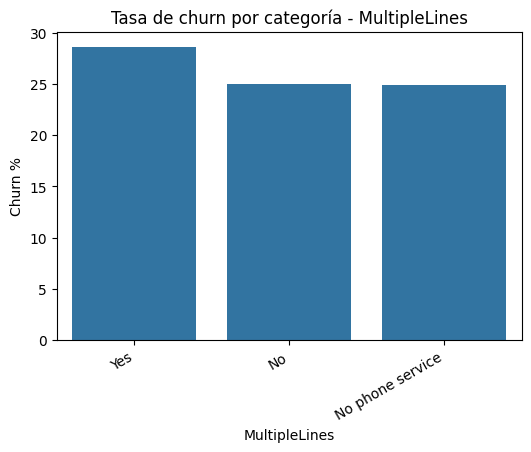

,1
MultipleLines,
Yes,28.609896
No,25.044248
No phone service,24.926686


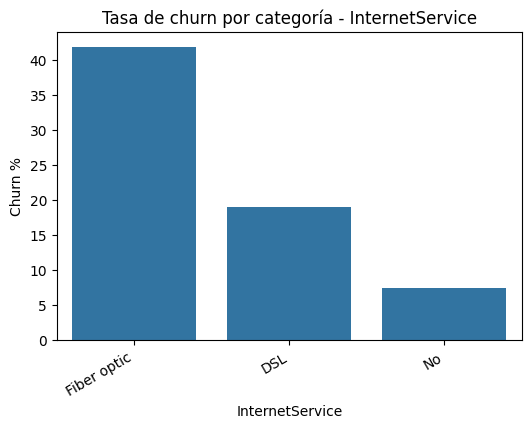

,1
InternetService,
Fiber optic,41.892765
DSL,18.959108
No,7.404980


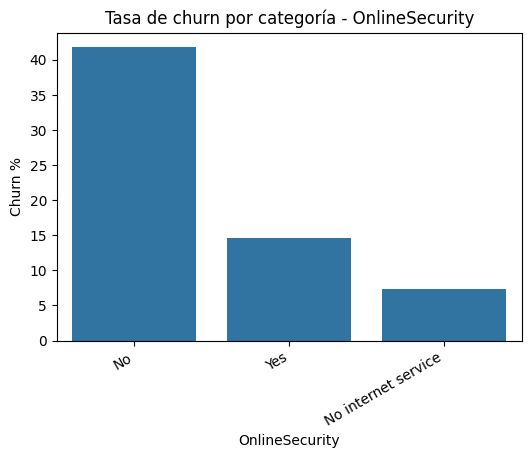

,1
OnlineSecurity,
No,41.766724
Yes,14.611194
No internet service,7.404980


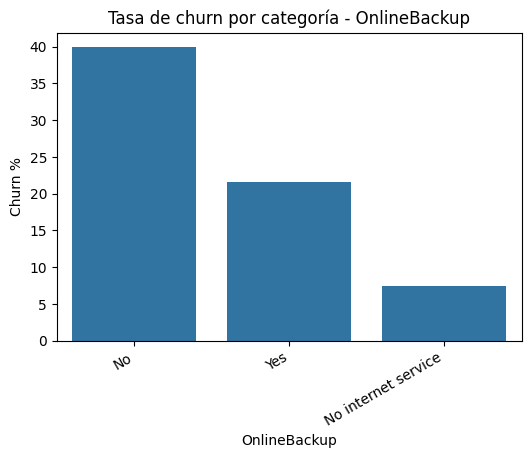

,1
OnlineBackup,
No,39.928756
Yes,21.531494
No internet service,7.404980


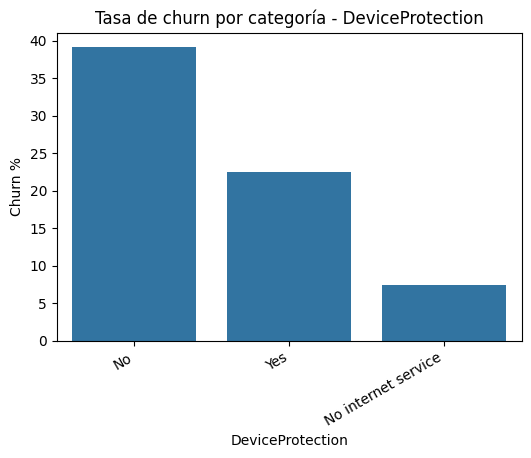

,1
DeviceProtection,
No,39.127625
Yes,22.502064
No internet service,7.404980


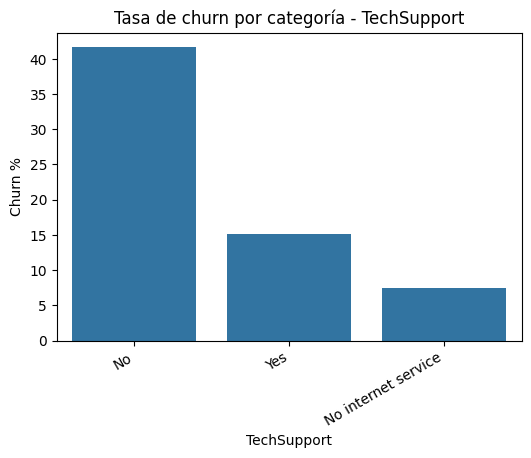

,1
TechSupport,
No,41.635474
Yes,15.166341
No internet service,7.404980


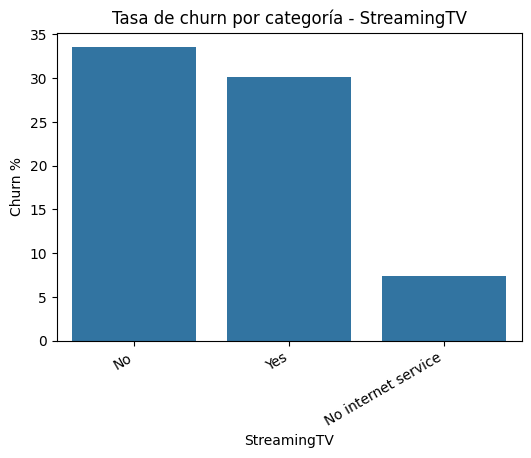

,1
StreamingTV,
No,33.523132
Yes,30.070188
No internet service,7.404980


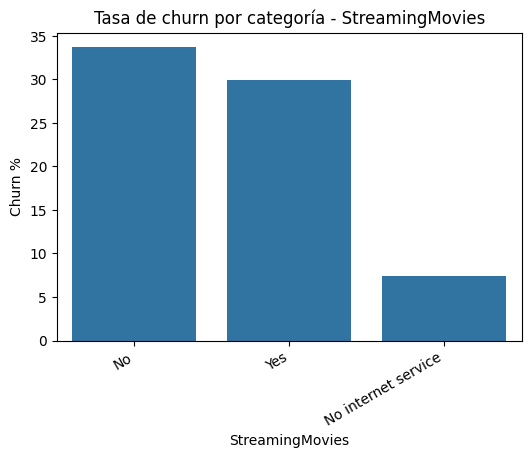

,1
StreamingMovies,
No,33.680431
Yes,29.941435
No internet service,7.404980


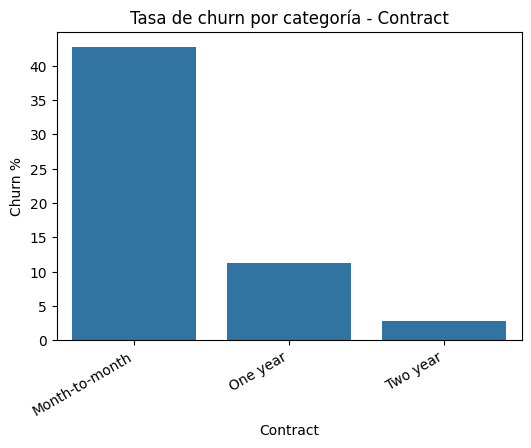

,1
Contract,
Month-to-month,42.709677
One year,11.269518
Two year,2.831858


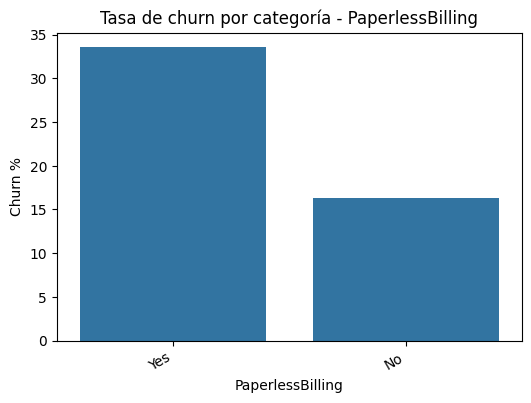

,1
PaperlessBilling,
Yes,33.565092
No,16.330084


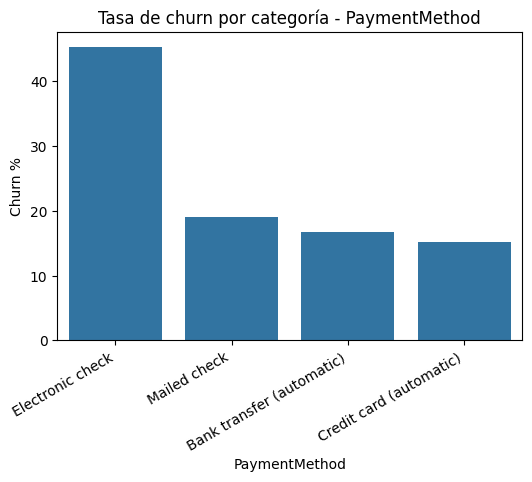

,1
PaymentMethod,
Electronic check,45.285412
Mailed check,19.106700
Bank transfer (automatic),16.709845
Credit card (automatic),15.243101


In [ ]:
# Proporción de churn por categoría
for col in cat_cols:
    prop = pd.crosstab(df[col], df["Churn"], normalize="index") * 100
    prop = prop[1].sort_values(ascending=False)  # porcentaje churn
    plt.figure(figsize=(6,4))
    sns.barplot(x=prop.index, y=prop.values)
    plt.title(f"Tasa de churn por categoría - {col}")
    plt.ylabel("Churn %")
    plt.xticks(rotation=30, ha="right")
    plt.show()

    display(prop)  # mostramos la tabla también

### Pandas Profiling

In [ ]:
!pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.3/399.3 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 44.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 43.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.0 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.2
    Uninstalling scipy-1.16.2:
      Successfully uninstalled scipy-1.16.2


In [ ]:
from ydata_profiling import ProfileReport

# Crear reporte
profile = ProfileReport(df, title="Telco Customer Churn - EDA", explorative=True)

# Mostrar en notebook
profile.to_notebook_iframe()

# O exportar a HTML
profile.to_file("telco_churn_profile.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 21/21 [00:06<00:00,  3.42it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Mini Dashboard

In [ ]:
!pip install dash plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 23.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import plotly.express as px
from dash import Dash, dcc, html, Input, Output

# Usamos el dataset limpio
df_dash = df.copy()

app = Dash(__name__)
app.title = "Churn EDA Dashboard"

num_cols = ["tenure", "MonthlyCharges", "TotalCharges", "SeniorCitizen"]
cat_cols = [c for c in df_dash.columns if c not in num_cols + ["customerID", "Churn"]]

app.layout = html.Div([
    html.H2("EDA Interactivo - Churn Prediction"),

    html.Div([
        html.Label("Variable categórica:"),
        dcc.Dropdown(options=cat_cols, value=cat_cols[0], id="cat-var"),
        dcc.Graph(id="bar-churn-cat")
    ], style={"width":"48%", "display":"inline-block", "verticalAlign":"top"}),

    html.Div([
        html.Label("Variable numérica:"),
        dcc.Dropdown(options=num_cols, value=num_cols[0], id="num-var"),
        dcc.Graph(id="hist-num")
    ], style={"width":"48%", "display":"inline-block", "marginLeft":"2%", "verticalAlign":"top"}),
])

# Callbacks
@app.callback(
    Output("bar-churn-cat", "figure"),
    Input("cat-var", "value")
)
def update_bar(cat):
    tmp = df_dash.groupby(cat)["Churn"].mean().reset_index()
    fig = px.bar(tmp, x=cat, y="Churn", title=f"Tasa de churn por {cat}")
    fig.update_layout(yaxis_tickformat=".0%")
    return fig

@app.callback(
    Output("hist-num", "figure"),
    Input("num-var", "value")
)
def update_hist(num):
    fig = px.histogram(df_dash, x=num, color="Churn", barmode="overlay", nbins=40,
                       title=f"Distribución de {num} por Churn")
    return fig

if __name__ == "__main__":
    app.run(debug=True, port=8050)


<IPython.core.display.Javascript object>